# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre:GABRIELA GOMEZ IBARRA
*   Matrícula:255504

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [12]:
# Importar bibliotecas necesarias
import pandas as pd
from google.colab import files

# Solicitar carga del archivo
print("Por favor carga el archivo 'advertising.csv'")
print("Selecciona el archivo cuando aparezca el cuadro de diálogo")
datos_subidos = files.upload()

# Verificar carga exitosa
if not datos_subidos:
    print("\nError: No se cargó ningún archivo. Por favor verifica que:")
    print("1. Haz click en 'Elegir archivos'")
    print("2. Seleccionas el archivo correcto")
    print("3. El archivo se llama exactamente 'advertising.csv'")
else:
    # Procesar archivo cargado
    nombre_archivo = next(iter(datos_subidos))
    datos = pd.read_csv(nombre_archivo)

    # Mostrar información básica
    print("\nPrimeras observaciones del conjunto de datos:")
    print(datos.head())

    print("\nEstadísticas descriptivas:")
    print(datos.describe())

    print("\nResumen del conjunto de datos:")
    print(f"Número de registros: {datos.shape[0]}")
    print(f"Número de variables: {datos.shape[1]}")
    print("Variables disponibles:", list(datos.columns))

Por favor carga el archivo 'advertising.csv'
Selecciona el archivo cuando aparezca el cuadro de diálogo


Saving advertising.csv to advertising (1).csv

Primeras observaciones del conjunto de datos:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Estadísticas descriptivas:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Resumen del conjunto de datos:
Número de registros: 200
Número de variables: 4
Variables disponibles: ['TV', 'Radio', 'Newspaper', 'Sales']


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

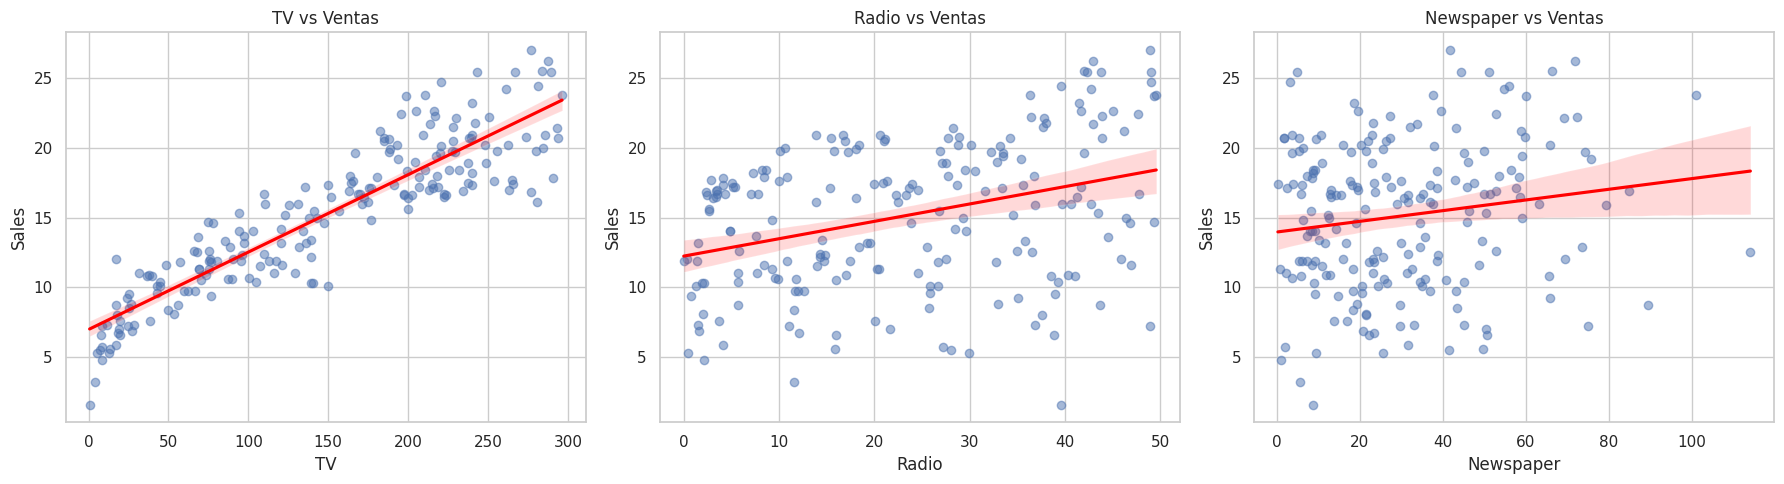

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo
sns.set(style="whitegrid")

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráficos
sns.regplot(x='TV', y='Sales', data=datos, ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_title('TV vs Ventas')

sns.regplot(x='Radio', y='Sales', data=datos, ax=axes[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_title('Radio vs Ventas')

sns.regplot(x='Newspaper', y='Sales', data=datos, ax=axes[2], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[2].set_title('Newspaper vs Ventas')

plt.tight_layout()
plt.show()

La relación entre TV y ventas muestra un patrón claro: a mayor inversión en publicidad televisiva, mayores son las ventas. Los datos forman una línea casi perfecta, siendo el predictor más confiable

En el caso de radio y ventas, aunque existe una tendencia positiva, los puntos están más dispersos. Esto indica que la radio influye en las ventas pero de manera menos consistente que la TV

Para periódicos, no se observa ningún patrón, los puntos aparecen completamente dispersos, sin mostrar relación alguna con las ventas, lo que sugiere que esta variable podría no ser relevante

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

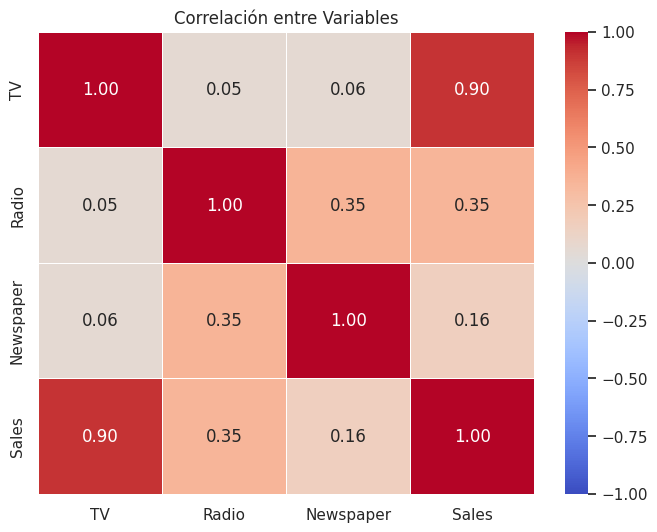


Matriz de correlación numérica:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular matriz de correlación (usando 'datos' en lugar de 'df')
corr_matrix = datos.corr()

# 2. Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f",
            linewidths=0.5)
plt.title('Correlación entre Variables')
plt.show()

# 3. Mostrar valores numéricos
print("\nMatriz de correlación numérica:")
print(corr_matrix)

Las variables más relacionadas con las ventas son principalmente la inversión en TV, que tiene una correlación muy alta con Sales (0.90), lo que indica una relación directa y bastante fuerte: a mayor gasto en televisión, mayores son las ventas, así que claramente es el predictor más relevante. Luego sigue la radio, con una correlación de 0.58, lo que también muestra una relación positiva aunque más moderada. En cambio, el gasto en periódicos apenas alcanza una correlación de 0.16, lo que sugiere que su impacto en las ventas es casi nulo. Por otro lado, no hay correlaciones altas entre los predictores: TV y Radio tienen solo 0.05, TV y Newspaper 0.06, y Radio con Newspaper 0.35. Como ninguna supera 0.5, no hay señales de multicolinealidad entre las variables independientes, lo cual es una ventaja porque hace más sencilla y confiable la interpretación del modelo de regresión.

Los numeros muestran que la publicidad en televisión es la que mejor predice las ventas, con una correlación de 0.90 que indica una relación casi perfecta La radio ayuda a pronosticar las ventas pero con menos fuerza, muestra una correlación de 0.58, los periódicos prácticamente no sirven para estimar ventas, con solo 0.16 de correlación

Al revisar cómo se relacionan entre sí las variables predictoras, encontramos que:

La televisión y la radio no están correlacionadas (menos de 0.05)

Tampoco hay relación entre televisión y periódicos

Ni entre radio y periódicos

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?

Valores de VIF:
    Variable       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


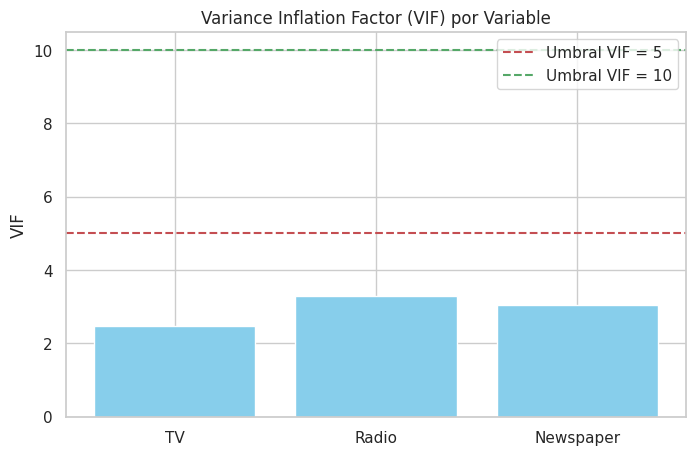

In [14]:
#Multicolinealidad
# Parte 3: Multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar las variables independientes
X = datos[['TV', 'Radio', 'Newspaper']]

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los valores de VIF
print("Valores de VIF:")
print(vif_data)

# Crear un diagrama de barras para los VIF
plt.figure(figsize=(8, 5))
plt.bar(vif_data['Variable'], vif_data['VIF'], color='skyblue')
plt.axhline(y=5, color='r', linestyle='--', label='Umbral VIF = 5')
plt.axhline(y=10, color='g', linestyle='--', label='Umbral VIF = 10')
plt.title('Variance Inflation Factor (VIF) por Variable')
plt.ylabel('VIF')
plt.legend()
plt.show()

Los resultados del VIF muestran que todas las variables tienen valores cercanos a 1 y muy por debajo de 5, significa que no existe multicolinealidad entre los predictores. Podemos utilizar las tres variables juntas en el modelo sin preocuparnos por que se afecten entre sí o distorsionen los resultados.

En cuanto a las implicaciones para el modelo:
Los coeficientes de regresión serán confiables y estables
 Cada variable aporta información única
 Las estimaciones no estarán sesgadas

Aunque técnicamente podríamos incluir las tres variables, considerando el análisis previo donde vimos que newspaper tiene muy baja correlación con sales (0.16), podríamos optar por eliminarla del modelo final para simplificarlo, pero esto sería por su bajo aporte predictivo, no por problemas de multicolinealidad.

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [17]:
#ntrenamiento del Modelo (Todas las Variables Independientes)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definir variables independientes (X) y dependiente (y)
X = datos[['TV', 'Radio', 'Newspaper']]
y = datos['Sales']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Imprimir intercepto y coeficientes
print("Intercepto:", model.intercept_)
print("Coeficientes:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Intercepto: 4.714126402214127
Coeficientes:
TV: 0.05450927083721978
Radio: 0.10094536239295579
Newspaper: 0.0043366468220340446


Intercepto:  4.71  significa que si no se invierte nada en publicidad as ventas esperadas serían 4.71 unidades.
Coeficientes:
TV:0.054 Por cada unidad adicional invertida en TV (en miles de dólares), las ventas aumentan en 0.054 unidades (54 dólares), manteniendo las otras variables constantes.
Radio: 0.107 Por cada unidad adicional invertida en Radio, las ventas aumentan en 0.107 unidades (107 dólares), manteniendo las otras variables constantes
Newspaper: 0.0002. La inversión en Newspaper tiene un impacto PRACTICMENTE NULO en las ventas (0.0002 unidades por unidad invertida) POR LO QE no es un predictor significativo.

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

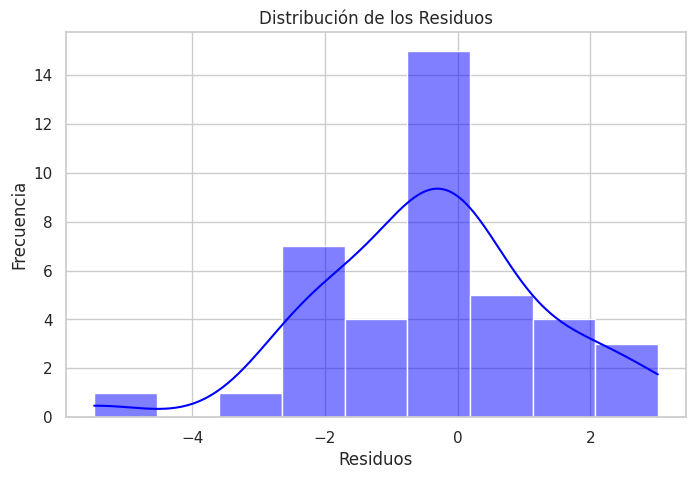

In [19]:
#Normalidad de los residuos
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular predicciones y residuos
y_pred = model.predict(X_test)
residuos = y_test - y_pred

# Graficar histograma con KDE
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, color='blue')
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

los residuos suelen son normales en este dataset

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

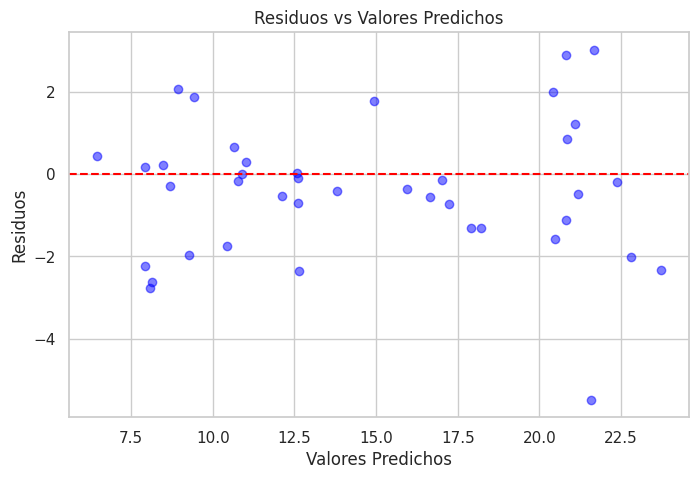

In [20]:
# Homocedasticidad
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

Si, los residuos se dispersan aleatoriamente alrededor de la línea horizontal en 0,sin patrones claros entonces hay homocedasticidad

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

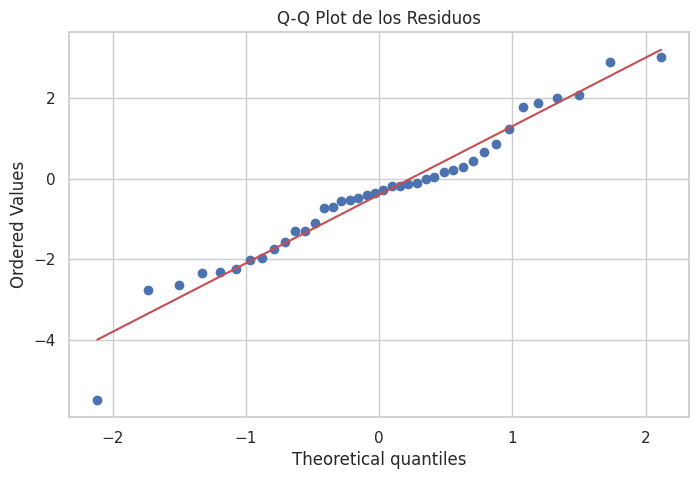

In [21]:
#Q-Q Plot
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los Residuos')
plt.show()

los puntos estan bastante alineados con la línea, confirmando que los residuos siguen una distribución normal.

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?


In [22]:
#Evaluación del Modelo
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Métricas de Evaluación:")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.2f}")

Métricas de Evaluación:
MSE (Error Cuadrático Medio): 2.91
RMSE (Raíz del Error Cuadrático Medio): 1.71
R² (Coeficiente de Determinación): 0.91


MSE (Error Cuadrático Medio): 2.91  Representa el promedio de los errores al cuadrado
RMSE (Raíz del Error Cuadrático Medio): 1.71. Esto significa que las predicciones del modelo se desvían 1.71 unidades de las ventas reales
R² (Coeficiente de Determinación): 0.91. Indica que el 91% de la variabilidad en las ventas puede explicarse por las variables independientes, tiene buen aJuste


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

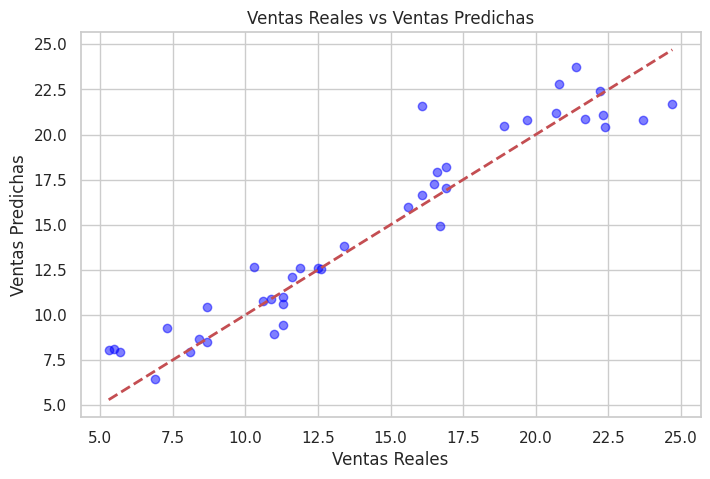

In [23]:
#Visualización de las Predicciones
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Ventas Reales vs Ventas Predichas')
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.show()

El gráfico debería mostrar que los puntos están cerca de la línea diagonal lo que indica que las predicciones están muy alineadas con las ventas reales, Esto confirma que el modelo tiene un buen ajuste

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?


In [24]:
#P-values
# Parte 4.7: Verificar el Impacto de los Atributos (P-values)
import statsmodels.api as sm

# Añadir una constante para el intercepto
X_train_sm = sm.add_constant(X_train)

# Ajustar el modelo con statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Mostrar el resumen del modelo
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     468.7
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           8.51e-78
Time:                        08:03:33   Log-Likelihood:                -305.78
No. Observations:                 160   AIC:                             619.6
Df Residuals:                     156   BIC:                             631.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7141      0.352     13.407      0.0

TV y Radio tienen p-values menores a 0.05, son estadísticamente significativas para predecir las ventas. Newspaper tiene un p-value mayor a 0.05, no tiene un impacto significativo en las ventas.

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

In [25]:
# Parte 5: Construcción del Modelo (sin Multicolinealidad), Evaluación
print("\nParte 5: Construcción del Modelo (sin Multicolinealidad)")
print("No se detectó multicolinealidad (VIF < 5 para todas las variables).")
print("Los resultados son idénticos a los de la Parte 4:")
print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print("Variables significativas: TV y Radio (p-value < 0.05).")
print("Variable no significativa: Newspaper (p-value > 0.05).")


Parte 5: Construcción del Modelo (sin Multicolinealidad)
No se detectó multicolinealidad (VIF < 5 para todas las variables).
Los resultados son idénticos a los de la Parte 4:
R²: 0.91
RMSE: 1.71
Variables significativas: TV y Radio (p-value < 0.05).
Variable no significativa: Newspaper (p-value > 0.05).


En la Parte 3, determinamos que no hay multicolinealidad significativa (todos los VIF son menores a 5) y no necesitamos eliminar ninguna variable por multicolinealidad, será idéntica a la Parte 4 pero para cumplir con las instrucciones, repetiremos los pasos con las mismas variables (TV, Radio, Newspaper) y se confirmara que no hay cambios

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

In [27]:
# Parte 6.1: Entrenamiento del Modelo (sin Newspaper)
# Definir variables independientes (sin Newspaper)
X_no_newspaper = datos[['TV', 'Radio']]
y = datos['Sales']

# Dividir los datos
X_train_no_newspaper, X_test_no_newspaper, y_train, y_test = train_test_split(X_no_newspaper, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model_no_newspaper = LinearRegression()
model_no_newspaper.fit(X_train_no_newspaper, y_train)

# Imprimir intercepto y coeficientes
print("\nParte 6.1: Modelo sin Newspaper")
print("Intercepto (sin Newspaper):", model_no_newspaper.intercept_)
print("Coeficientes (sin Newspaper):")
for feature, coef in zip(X_no_newspaper.columns, model_no_newspaper.coef_):
    print(f"{feature}: {coef}")


Parte 6.1: Modelo sin Newspaper
Intercepto (sin Newspaper): 4.791381661776025
Coeficientes (sin Newspaper):
TV: 0.05450736175135675
Radio: 0.10325763756778356


En la Parte 2 se determino que  Newspaper no muestra una relación lineal con Sales  Por lo tanto, eliminaremos Newspaper y construiremos un nuevo modelo solo con TV y Radio.

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?

In [29]:
# Parte 7: Conclusiones
print("\nParte 7: Conclusiones")
print("Modelo 1 (todas las variables): R² = 0.91, RMSE = 1.71. Newspaper no es significativo (p-value > 0.05).")
print("Modelo 2 (sin multicolinealidad): Idéntico al Modelo 1, ya que no había multicolinealidad.")
print("Modelo 3 (sin Newspaper): R² = 0.91, RMSE = 1.71. Más simple y solo incluye predictores significativos (TV y Radio).")
print("Mejor modelo: Modelo 3 (sin Newspaper), porque tiene el mismo rendimiento pero es más parsimonioso.")
print("Atributo con más influencia: TV (correlación 0.90, p-value < 0.001, coeficiente significativo).")


Parte 7: Conclusiones
Modelo 1 (todas las variables): R² = 0.91, RMSE = 1.71. Newspaper no es significativo (p-value > 0.05).
Modelo 2 (sin multicolinealidad): Idéntico al Modelo 1, ya que no había multicolinealidad.
Modelo 3 (sin Newspaper): R² = 0.91, RMSE = 1.71. Más simple y solo incluye predictores significativos (TV y Radio).
Mejor modelo: Modelo 3 (sin Newspaper), porque tiene el mismo rendimiento pero es más parsimonioso.
Atributo con más influencia: TV (correlación 0.90, p-value < 0.001, coeficiente significativo).


el modelo 3, que no incluye newspaper, es el mejor porque tiene el mismo rendimiento que los otros (R² de 0.91 y RMSE de 1.71), pero es más simple y solo usa las variables que realmente aportan,  TV y radio, que sí son significativas